<a href="https://colab.research.google.com/github/chanhyeong00/study_for_deep_learning_mini_project/blob/main/Binary_classfication_IMDB_movie_review/Binary_classfication_IMDB_movie_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Library

In [ ]:
import pandas as pd
import tensorflow as tf

from bs4 import BeautifulSoup
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np
import matplotlib.pyplot as plt

### Data Load

kaggle 내 계정 account 에서 create new token으로 kaggle.json을 다운받고 다음 코드 실행

In [ ]:
# kaggle.json 파일의 위치 변경
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

 82% 21.0M/25.7M [00:00<00:00, 61.7MB/s]
100% 25.7M/25.7M [00:00<00:00, 59.6MB/s]


이렇게 하면 쉽게 데이터를 불러올 수 있다.

In [ ]:
!unzip imdb-dataset-of-50k-movie-reviews

Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [ ]:
df = pd.read_csv('IMDB Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
print(df['review'][0]) # 문장으로 이뤄져 있음

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [ ]:
df['sentiment'].unique() # 2개의 타입 존재

array(['positive', 'negative'], dtype=object)

### Data Preprocessing

#### labeling


In [ ]:
# df['sentiment'][df['sentiment'] == 'positive'] = 1
# df['sentiment'][df['sentiment'] == 'negative'] = 0

In [ ]:
df.loc[df['sentiment'] == 'positive', 'sentiment'] = 1
df.loc[df['sentiment'] == 'negative', 'sentiment'] = 0

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
df['sentiment'].unique()

array([1, 0], dtype=object)

#### divide Text and sentiment(label)

In [ ]:
data = df['review'].to_numpy()
label = df['sentiment'].to_numpy().astype(np.float32) # tensor 변환을 위해

print(data[:3])
print(label[:3])
print(len(data[1]), len(data[2]), len(data[0]))

["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the f

#### Remove Stopwords

In [ ]:
stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at",
             "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do",
             "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having",
             "he", "hed", "hes", "her", "here", "heres", "hers", "herself", "him", "himself", "his", "how",
             "hows", "i", "id", "ill", "im", "ive", "if", "in", "into", "is", "it", "its", "itself",
             "lets", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought",
             "our", "ours", "ourselves", "out", "over", "own", "same", "she", "shed", "shell", "shes", "should",
             "so", "some", "such", "than", "that", "thats", "the", "their", "theirs", "them", "themselves", "then",
             "there", "theres", "these", "they", "theyd", "theyll", "theyre", "theyve", "this", "those", "through",
             "to", "too", "under", "until", "up", "very", "was", "we", "wed", "well", "were", "weve", "were",
             "what", "whats", "when", "whens", "where", "wheres", "which", "while", "who", "whos", "whom", "why",
             "whys", "with", "would", "you", "youd", "youll", "youre", "youve", "your", "yours", "yourself",
             "yourselves"]

# 문자열에서 문자를 다른 문자로 변환하기 위한 변환 테이블을 생성
# string.punctuation은 Python 내장 모듈인 string 모듈에서 제공하는 구두점에 대한 문자열
# 이 문자열은 모든 표준 구두점 기호를 포함합니다.
# 첫 번째 매개변수와 두 번째 매개변수는 빈 문자열로 지정되었으므로 어떠한 변환도 수행되지 않음
# 세 번째 매개변수에는 구두점을 포함한 문자열이 제공된다.
# str.translate() 함수와 함께 사용될 수 있습니다. 이를 통해 문자열에서 구두점을 제거할 수 있다
table = str.maketrans('', '', string.punctuation)
filtered_data = []

for idx, text in enumerate(data):
  text = text.replace(",", " , ")  # 리뷰에서 자주 쓰이는 문자도 구분하도록 공백 추가
  text = text.replace(".", " . ")
  text = text.replace("-", " - ")
  text = text.replace("/", " / ")

  # HTML 태그 제거
  soup = BeautifulSoup(text)
  text = soup.get_text()
  words = text.split()

  filtered_sentence = ""

  for word in words:
      word = word.translate(table) # 구두점 제거
      if word not in stopwords: # stop word filtering
          filtered_sentence = filtered_sentence + word + " "
  filtered_data.append(filtered_sentence)
filtered_data = np.array(filtered_data)
print(len(filtered_data[1]), len(filtered_data[2]), len(filtered_data[0]))

<ipython-input-8-bdb5ab319037>:31: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text)


694 631 1245


#### divide Test set, Valid set and Train set

50,000 개의 리뷰이므로 40,000개는 훈련세트, 5,000개는 검증세트, 5,000개는 테스트세트로 사용하겠다.

In [ ]:
train_split = 40_000


# 데이터는 모두 문장을 나타냄
train_data = filtered_data[:train_split]
test_data = filtered_data[train_split:]

train_label = label[:train_split]
test_label = label[train_split:]

이제 문장을 토큰화 시키겠다.

#### Tokenize Sentence

In [ ]:
vocab_size = 25_000 # 변경하며 봐야할 값
embedding_dim = 16
max_length = 1000 # 변경하며 봐야할 값
trunc_type='post'
padding_type='post'
oov_tok = ""

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_data)

word_index = tokenizer.word_index

**GPT tokenizer 설명**

len(tokenizer.word_index)와 tokenizer.num_words는 모두 토크나이저 객체의 단어 집합 크기에 관련된 값을 나타냅니다. 그러나 이 두 값은 다른 의미를 가집니다.

- len(tokenizer.word_index): 이것은 토크나이저 객체가 처리한 전체 단어 집합의 크기를 나타냅니다. 즉, **텍스트 데이터에 있는 모든 고유한 단어의 개수를 의미합니다.** 이 단어 집합에는 중복이 없으며, 모든 텍스트 데이터를 통해 생성됩니다.

- tokenizer.num_words: **이것은 토크나이저 객체가 생성할 수 있는 최대 단어 수를 나타냅니다.** 이 값은 Tokenizer 객체를 초기화할 때 num_words 매개변수로 설정한 값입니다. **이 값은 토크나이저가 고려할 최대 단어의 개수를 제한하는 역할**을 합니다.

따라서 이 두 값은 서로 다른 개념이며, 보통 tokenizer.num_words의 값은 len(tokenizer.word_index)보다 작거나 같습니다. 이는 토크나이저가 최대 단어 수를 제한하고자 할 때 사용되는 값입니다. 만약 len(tokenizer.word_index)가 tokenizer.num_words보다 크다면, tokenizer.num_words에 설정된 값에 따라 word_index에서 가장 빈번한 단어들이 선택됩니다.

In [ ]:
print(len(word_index), tokenizer.num_words)

109955 25000


#### Change Sentences to Sequences and add Padding

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_data)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_data)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
print(len(train_padded[10]), type(train_padded))

1000 <class 'numpy.ndarray'>


데이터가 모두 준비되었으니 이제 모델을 구성해보자

### Model Configuration

#### Simple Model

우선 임베딩 층을 사용한 간단한 모델로 훈련을 해보겠다.


In [ ]:
embedding_dims = 16

* label = 1., 0. 이런식(np.float64 or np.float32)으로 되어야 텐서로 변환이 된다. 1.0, 0.0(float)나 1, 0 (Int)는 변환이 안 돼서 오류가 뜸

- input_dim: 이 매개변수는 사용하는 어휘 사전의 크기입니다. 즉, 단어의 총 개수입니다.

- output_dim: 이 매개변수는 Embedding 층에서 각 단어를 매핑할 벡터의 크기입니다. 즉, Embedding 층의 출력 차원 수입니다.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dims),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])
history = model.fit(train_padded, train_label, epochs=20,
                    validation_data=[test_padded, test_label])

Epoch 1/20
1250/1250 [==============================] - 15s 11ms/step - loss: 0.5383 - accuracy: 0.7436 - val_loss: 0.3362 - val_accuracy: 0.8711
Epoch 2/20
1250/1250 [==============================] - 14s 11ms/step - loss: 0.2736 - accuracy: 0.8950 - val_loss: 0.2718 - val_accuracy: 0.8916
Epoch 3/20
1250/1250 [==============================] - 14s 11ms/step - loss: 0.2150 - accuracy: 0.9191 - val_loss: 0.2533 - val_accuracy: 0.9015
Epoch 4/20
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1822 - accuracy: 0.9330 - val_loss: 0.2514 - val_accuracy: 0.9035
Epoch 5/20
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1581 - accuracy: 0.9430 - val_loss: 0.2631 - val_accuracy: 0.8988
Epoch 6/20
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1379 - accuracy: 0.9513 - val_loss: 0.2620 - val_accuracy: 0.9034
Epoch 7/20
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1239 - accuracy: 0.9571 - val_loss: 0.2768 -

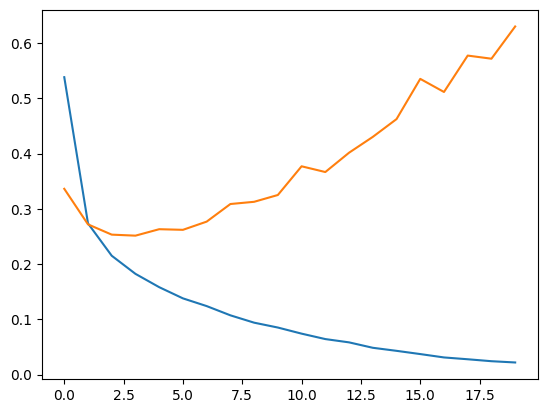

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

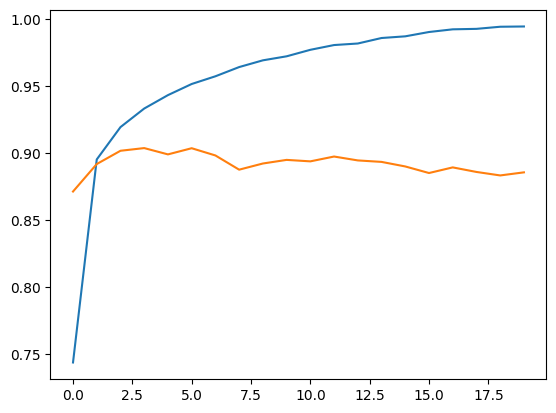

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

확실히 overfitting 이 보인다. 이를 해결하기 위해 옵티마이저의 학습률을 조정하겠다.

##### Change Learning Rate

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

adam = tf.keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.9,
                                beta_2=0.999, amsgrad=False)
# beta_1과 beta_2, amsgrad는 기본값을 그대로 사용한다.
model.compile(loss='binary_crossentropy', optimizer=adam,
               metrics=['accuracy'])
history = model.fit(train_padded, train_label, epochs=20,
                    validation_data=[test_padded, test_label])

Epoch 1/20
1250/1250 [==============================] - 13s 10ms/step - loss: 0.6926 - accuracy: 0.5644 - val_loss: 0.6919 - val_accuracy: 0.5175
Epoch 2/20
1250/1250 [==============================] - 13s 10ms/step - loss: 0.6895 - accuracy: 0.6675 - val_loss: 0.6860 - val_accuracy: 0.8070
Epoch 3/20
1250/1250 [==============================] - 13s 11ms/step - loss: 0.6785 - accuracy: 0.7352 - val_loss: 0.6689 - val_accuracy: 0.7223
Epoch 4/20
1250/1250 [==============================] - 13s 10ms/step - loss: 0.6527 - accuracy: 0.7930 - val_loss: 0.6348 - val_accuracy: 0.8166
Epoch 5/20
1250/1250 [==============================] - 15s 12ms/step - loss: 0.6100 - accuracy: 0.8245 - val_loss: 0.5871 - val_accuracy: 0.7998
Epoch 6/20
1250/1250 [==============================] - 12s 10ms/step - loss: 0.5570 - accuracy: 0.8360 - val_loss: 0.5332 - val_accuracy: 0.8394
Epoch 7/20
1250/1250 [==============================] - 12s 10ms/step - loss: 0.5032 - accuracy: 0.8493 - val_loss: 0.4838 -

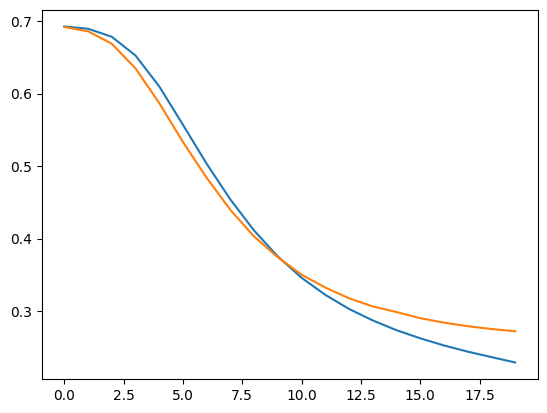

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

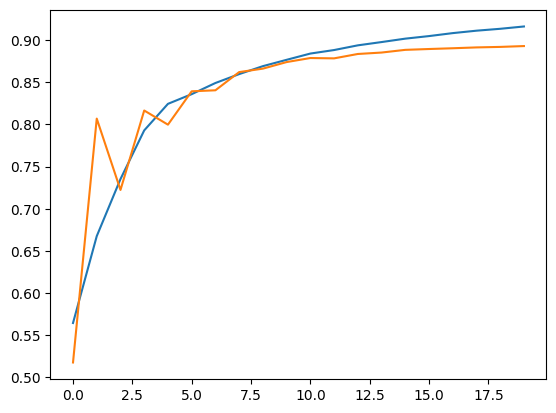

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

꽤나 해결된 거 같다

##### Change vocab_size

In [ ]:
wc=tokenizer.word_counts
print(wc['one'])
# OrderedDict([('one', 42205), ('reviewers', 404), ('mentioned', 856), ('watching', 7319), ...
# (key, value)

42205


In [ ]:
from collections import OrderedDict
newlist = (OrderedDict(sorted(wc.items(), key=lambda x:x[1], reverse=True))) # 빈도순 정렬
#print(newlist)
# OrderedDict([('i', 114657), ('the', 73539), ('movie', 69677)...

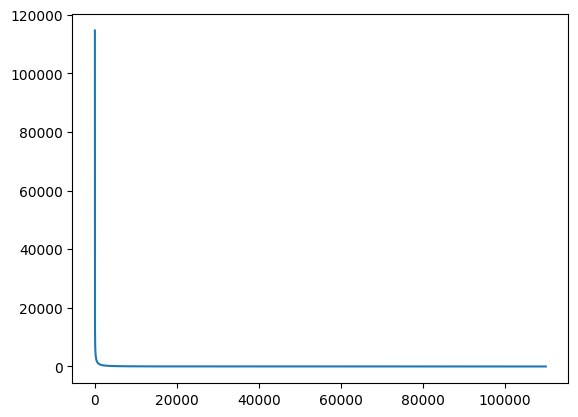

In [ ]:
xs = []
ys = []
curr_x = 1
for item in newlist: # item은 키값(value)을 나타낸다
  xs.append(curr_x)
  curr_x += 1
  ys.append(newlist[item])
plt.plot(xs, ys)
plt.show()

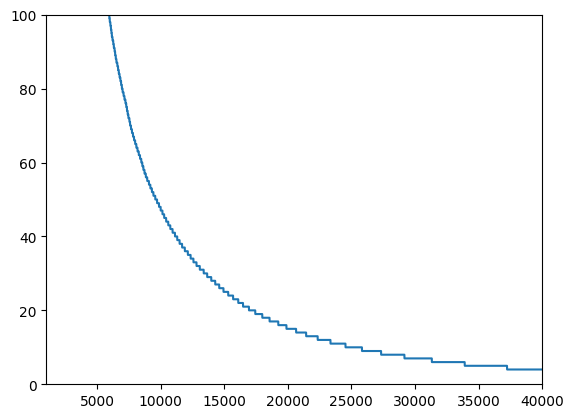

In [ ]:
plt.plot(xs, ys)
plt.axis([1000,40000, 0, 100]) # x 범위, y 범위
plt.show()

모두 의미 있는 값이다. 하지만 빈도 차이가 크다.


10,000번쨰 이후론 40개 정도 미만으로 쓰인다. 그렇다면 vocab_size를 줄여서 보겠다.

(토크나이저는 10,000개만 고려해도 될 거 같다)

In [ ]:
vocab_size = 10_000 # 10,000으로 변경
embedding_dim = 16
max_length = 1000 # 500으로 줄여보자
trunc_type='post'
padding_type='post'
oov_tok = ""

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_data)

word_index = tokenizer.word_index

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_data)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_data)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dims),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])
history = model.fit(train_padded, train_label, epochs=20,
                    validation_data=[test_padded, test_label])

Epoch 1/20
1250/1250 [==============================] - 11s 8ms/step - loss: 0.5672 - accuracy: 0.7215 - val_loss: 0.3687 - val_accuracy: 0.8651
Epoch 2/20
1250/1250 [==============================] - 13s 10ms/step - loss: 0.3012 - accuracy: 0.8869 - val_loss: 0.2814 - val_accuracy: 0.8910
Epoch 3/20
1250/1250 [==============================] - 10s 8ms/step - loss: 0.2432 - accuracy: 0.9069 - val_loss: 0.2657 - val_accuracy: 0.8957
Epoch 4/20
1250/1250 [==============================] - 10s 8ms/step - loss: 0.2172 - accuracy: 0.9180 - val_loss: 0.2587 - val_accuracy: 0.8979
Epoch 5/20
1250/1250 [==============================] - 10s 8ms/step - loss: 0.1994 - accuracy: 0.9235 - val_loss: 0.2588 - val_accuracy: 0.8988
Epoch 6/20
1250/1250 [==============================] - 10s 8ms/step - loss: 0.1866 - accuracy: 0.9294 - val_loss: 0.2614 - val_accuracy: 0.8978
Epoch 7/20
1250/1250 [==============================] - 9s 7ms/step - loss: 0.1752 - accuracy: 0.9351 - val_loss: 0.2665 - val_ac

**max_len=1,000일 떄**

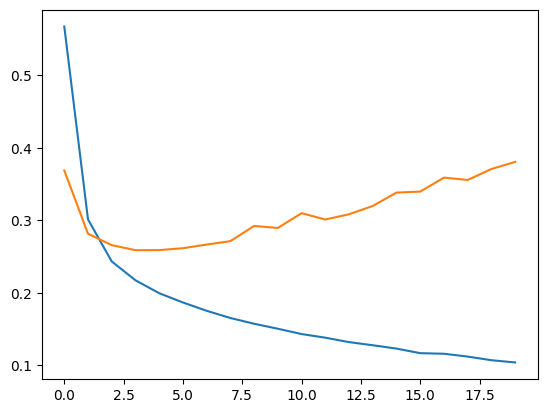

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

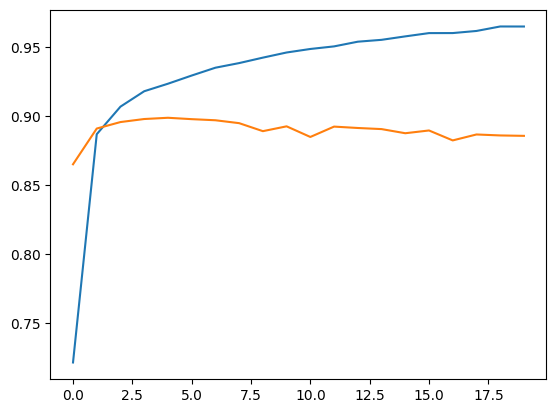

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

사전의 크기를 변경하는 것만으로도 어느정도 줄었다.

##### Change Embedding dims

임베딩 크기를 결정하는 모범 사례는 어휘 사전의 네제곱근을 사용하는 것이다.

10,000 ^ (1/4) 는 10이다

In [ ]:
embedding_dims = 10

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dims),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])
history = model.fit(train_padded, train_label, epochs=20,
                    validation_data=[test_padded, test_label])

Epoch 1/20
1250/1250 [==============================] - 11s 8ms/step - loss: 0.5890 - accuracy: 0.7093 - val_loss: 0.3965 - val_accuracy: 0.8562
Epoch 2/20
1250/1250 [==============================] - 9s 7ms/step - loss: 0.3163 - accuracy: 0.8824 - val_loss: 0.2903 - val_accuracy: 0.8868
Epoch 3/20
1250/1250 [==============================] - 10s 8ms/step - loss: 0.2539 - accuracy: 0.9034 - val_loss: 0.2770 - val_accuracy: 0.8887
Epoch 4/20
1250/1250 [==============================] - 10s 8ms/step - loss: 0.2260 - accuracy: 0.9131 - val_loss: 0.2614 - val_accuracy: 0.8961
Epoch 5/20
1250/1250 [==============================] - 10s 8ms/step - loss: 0.2065 - accuracy: 0.9222 - val_loss: 0.2626 - val_accuracy: 0.8960
Epoch 6/20
1250/1250 [==============================] - 9s 7ms/step - loss: 0.1934 - accuracy: 0.9279 - val_loss: 0.2632 - val_accuracy: 0.8949
Epoch 7/20
1250/1250 [==============================] - 9s 8ms/step - loss: 0.1823 - accuracy: 0.9318 - val_loss: 0.2638 - val_accur

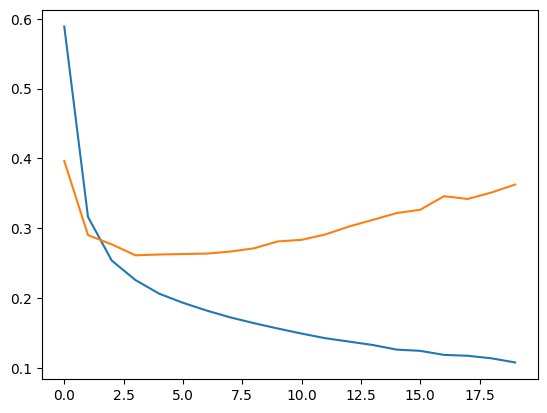

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

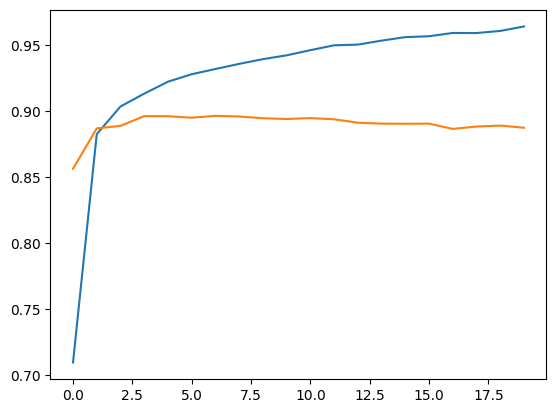

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

그래프의 요동이 조금 더 줄었다.

**max_len=2000 일 때**

In [ ]:
vocab_size = 10_000 # 10,000으로 변경
embedding_dim = 10
max_length = 2000 # 2000으로 늘려보자
trunc_type='post'
padding_type='post'
oov_tok = ""

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_data)

word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_data)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_data)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dims),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])
history = model.fit(train_padded, train_label, epochs=20,
                    validation_data=[test_padded, test_label])

Epoch 1/20
1250/1250 [==============================] - 16s 12ms/step - loss: 0.6757 - accuracy: 0.5846 - val_loss: 0.5996 - val_accuracy: 0.6784
Epoch 2/20
1250/1250 [==============================] - 13s 11ms/step - loss: 0.4466 - accuracy: 0.8378 - val_loss: 0.3575 - val_accuracy: 0.8748
Epoch 3/20
1250/1250 [==============================] - 13s 10ms/step - loss: 0.3158 - accuracy: 0.8807 - val_loss: 0.3081 - val_accuracy: 0.8816
Epoch 4/20
1250/1250 [==============================] - 13s 11ms/step - loss: 0.2715 - accuracy: 0.8972 - val_loss: 0.2903 - val_accuracy: 0.8855
Epoch 5/20
1250/1250 [==============================] - 13s 11ms/step - loss: 0.2471 - accuracy: 0.9063 - val_loss: 0.2759 - val_accuracy: 0.8934
Epoch 6/20
1250/1250 [==============================] - 13s 10ms/step - loss: 0.2311 - accuracy: 0.9117 - val_loss: 0.2711 - val_accuracy: 0.8902
Epoch 7/20
1250/1250 [==============================] - 13s 11ms/step - loss: 0.2182 - accuracy: 0.9183 - val_loss: 0.2619 -

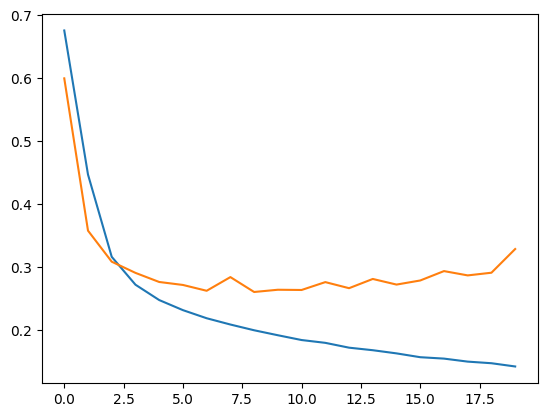

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

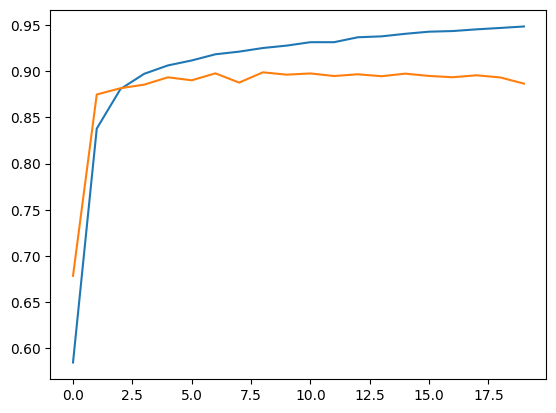

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

maxlen을 늘리니까 overfitting이 감소했다

더 늘려볼 순 있겠지만 시간이 오래 걸리니 넘어가겠다.

##### **Combining ideas**
위에서 했던 것 처럼 overfitting을 낮추기 위해 learning rate를 낮추어 보겠다

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dims),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

])
adam = tf.keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.9,
                                beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer=adam,
              metrics=['accuracy'])
history = model.fit(train_padded, train_label, epochs=20,
                    validation_data=[test_padded, test_label])

Epoch 1/20
1250/1250 [==============================] - 18s 13ms/step - loss: 0.6930 - accuracy: 0.5110 - val_loss: 0.6928 - val_accuracy: 0.5116
Epoch 2/20
1250/1250 [==============================] - 14s 11ms/step - loss: 0.6924 - accuracy: 0.5651 - val_loss: 0.6916 - val_accuracy: 0.5179
Epoch 3/20
1250/1250 [==============================] - 13s 10ms/step - loss: 0.6902 - accuracy: 0.6338 - val_loss: 0.6881 - val_accuracy: 0.7790
Epoch 4/20
1250/1250 [==============================] - 13s 10ms/step - loss: 0.6850 - accuracy: 0.7044 - val_loss: 0.6811 - val_accuracy: 0.7876
Epoch 5/20
1250/1250 [==============================] - 13s 10ms/step - loss: 0.6756 - accuracy: 0.7486 - val_loss: 0.6693 - val_accuracy: 0.7730
Epoch 6/20
1250/1250 [==============================] - 13s 10ms/step - loss: 0.6610 - accuracy: 0.7850 - val_loss: 0.6520 - val_accuracy: 0.7963
Epoch 7/20
1250/1250 [==============================] - 14s 11ms/step - loss: 0.6401 - accuracy: 0.7902 - val_loss: 0.6295 -

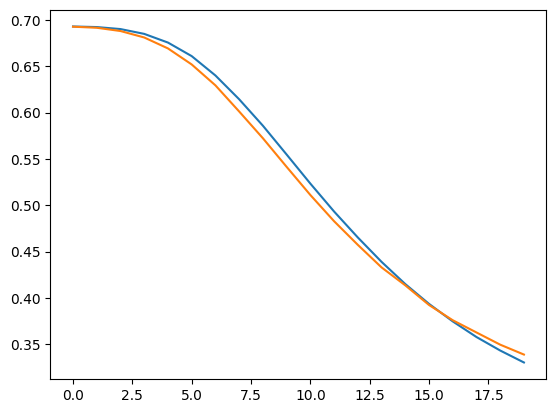

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

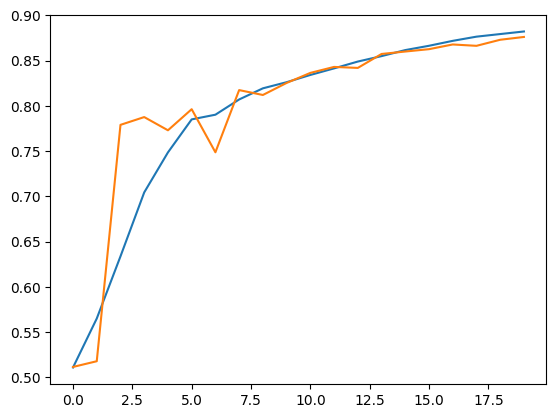

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

좋다. overfitting이 거의 해결되었다.

에폭을 늘린다면 더 높은 정확도를 얻을 것 같다. 하지만 시간 이슈로 생략...

##### Predcition by using model

In [ ]:
df['sentiment'].unique()
# 확률은 높을수록 1에(positive) 가깝고, 낮을수록 0(negative) 에 가까움

array([1, 0], dtype=object)

In [ ]:
# 긍정 여러개(positive)
sentences= [
"Absolutely brilliant movie! The storyline kept me hooked from start to finish.",
"A must-watch film! The performances were outstanding and the cinematography was breathtaking.",
"I was blown away by this movie! The direction was flawless and the soundtrack was mesmerizing.",
"Incredible film! I couldn't take my eyes off the screen the entire time.",
"A cinematic masterpiece! The acting was superb and the visual effects were stunning.",
"Such a heartwarming movie! The characters were well-developed and the message was powerful.",
"Thoroughly enjoyed every moment of this film! It's a true gem.",
"Fantastic movie! The plot twists kept me guessing until the very end.",
"An instant classic! The storytelling was captivating and the acting was phenomenal.",
"Bravo to the cast and crew! This movie exceeded all my expectations."
]

sequences = tokenizer.texts_to_sequences(sentences)
padded_seqeunces = pad_sequences(sequences, maxlen=100, padding=padding_type, truncating=trunc_type)

print(model.predict(padded_seqeunces))

1/1 [==============================] - 0s 23ms/step
[[0.6675481 ]
 [0.9992689 ]
 [0.52318317]
 [0.88705415]
 [0.9871617 ]
 [0.82704395]
 [0.9999621 ]
 [0.95036066]
 [0.56499785]
 [0.84300935]]


In [ ]:
# 부정 여러개(negative)

sentences = [
"Disappointing movie. The plot was confusing and the characters were underdeveloped.",
"I found this film to be quite dull. The story lacked depth and the pacing was slow.",
"Not worth the hype. The acting felt forced and the dialogue was cliché.",
"Mediocre at best. I expected more from such a highly anticipated movie.",
"I regret watching this movie. It was a complete waste of time.",
"Disjointed storytelling. The film failed to engage me on any level.",
"Uninspiring and forgettable. I wouldn't recommend this movie to anyone.",
"Poorly executed. The visuals were unimpressive and the plot was predictable.",
"A major letdown. I had high hopes for this movie but it fell short in every aspect.",
"I was bored throughout the entire film. There was nothing memorable about it."

]

sequences = tokenizer.texts_to_sequences(sentences)
padded_seqeunces = pad_sequences(sequences, maxlen=100, padding=padding_type, truncating=trunc_type)

print(model.predict(padded_seqeunces))

1/1 [==============================] - 0s 56ms/step
[[2.17910012e-04]
 [7.46227521e-03]
 [9.73042406e-05]
 [9.93066549e-01]
 [4.18763328e-03]
 [4.31749132e-03]
 [5.51178902e-02]
 [1.21841396e-04]
 [2.59448469e-01]
 [3.32103204e-03]]


얼추 잘 예측한다.

#### RNN Model

##### Data

In [ ]:
vocab_size = 10_000 # 10,000으로 변경
embedding_dim = 10
max_length = 1000
trunc_type='post'
padding_type='post'
oov_tok = ""

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_data)

word_index = tokenizer.word_index

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_data)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_data)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

##### LSTM RNN

Bidirectional LSTM layer

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 10)          100000    
                                                                 
 bidirectional_3 (Bidirecti  (None, 20)                1680      
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 24)                504       
                                                                 
 dense_7 (Dense)             (None, 1)                 25        
                                                                 
Total params: 102209 (399.25 KB)
Trainable params: 102209 (399.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

adam = tf.keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.9,
                                beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer=adam,
              metrics=['accuracy'])
history = model.fit(train_padded, train_label, epochs=20,
                    validation_data=[test_padded, test_label])

Epoch 1/20
1250/1250 [==============================] - 134s 105ms/step - loss: 0.6247 - accuracy: 0.6425 - val_loss: 0.3682 - val_accuracy: 0.8530
Epoch 2/20
1250/1250 [==============================] - 96s 77ms/step - loss: 0.3075 - accuracy: 0.8820 - val_loss: 0.2895 - val_accuracy: 0.8860
Epoch 3/20
1250/1250 [==============================] - 88s 70ms/step - loss: 0.2419 - accuracy: 0.9106 - val_loss: 0.2761 - val_accuracy: 0.8914
Epoch 4/20
1250/1250 [==============================] - 85s 68ms/step - loss: 0.2100 - accuracy: 0.9243 - val_loss: 0.2836 - val_accuracy: 0.8922
Epoch 5/20
1250/1250 [==============================] - 77s 62ms/step - loss: 0.1884 - accuracy: 0.9328 - val_loss: 0.2743 - val_accuracy: 0.8927
Epoch 6/20
1250/1250 [==============================] - 88s 71ms/step - loss: 0.1721 - accuracy: 0.9408 - val_loss: 0.2828 - val_accuracy: 0.8909
Epoch 7/20
1250/1250 [==============================] - 76s 61ms/step - loss: 0.1589 - accuracy: 0.9462 - val_loss: 0.3029

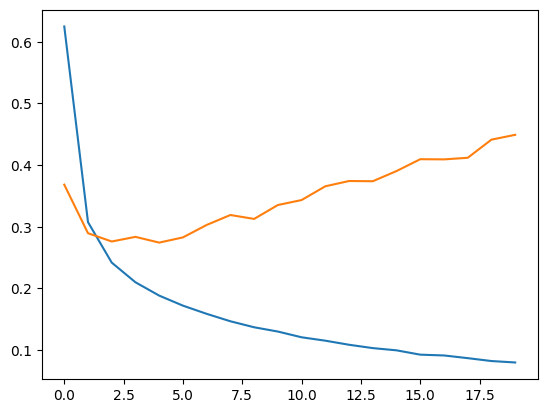

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

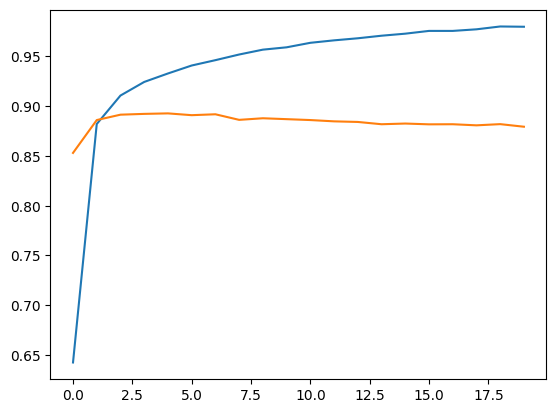

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

overfitting이 보인다. dropout 층을 생성하고 LSTM 층을 하나 더 쌓아보겠다.

##### Stacking LSTM + Dropout + Lower lr




In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,
                                                       return_sequences=True, dropout=0.2)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, dropout=0.2)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

adam = tf.keras.optimizers.Adam(learning_rate=1e-5, beta_1=0.9,
                                beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer=adam,
              metrics=['accuracy'])
history = model.fit(train_padded, train_label, epochs=20,
                    validation_data=[test_padded, test_label])

Epoch 1/20
1250/1250 [==============================] - 214s 165ms/step - loss: 0.6932 - accuracy: 0.5002 - val_loss: 0.6932 - val_accuracy: 0.4993
Epoch 2/20
1250/1250 [==============================] - 161s 129ms/step - loss: 0.6930 - accuracy: 0.5002 - val_loss: 0.6927 - val_accuracy: 0.4992
Epoch 3/20
1250/1250 [==============================] - 147s 118ms/step - loss: 0.6921 - accuracy: 0.5197 - val_loss: 0.6910 - val_accuracy: 0.5645
Epoch 4/20
1250/1250 [==============================] - 144s 115ms/step - loss: 0.6880 - accuracy: 0.5801 - val_loss: 0.6814 - val_accuracy: 0.6076
Epoch 5/20
1250/1250 [==============================] - 136s 109ms/step - loss: 0.6331 - accuracy: 0.6552 - val_loss: 0.5794 - val_accuracy: 0.7680
Epoch 6/20
1250/1250 [==============================] - 144s 115ms/step - loss: 0.5525 - accuracy: 0.7897 - val_loss: 0.5204 - val_accuracy: 0.8155
Epoch 7/20
1250/1250 [==============================] - 144s 115ms/step - loss: 0.4958 - accuracy: 0.8130 - val_

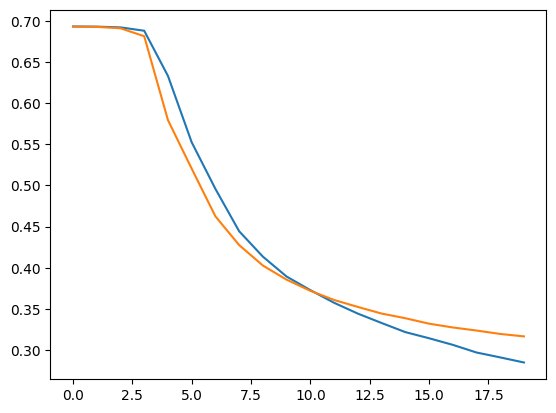

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

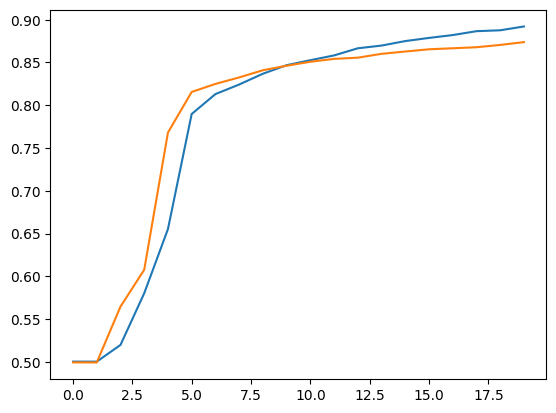

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

그래프가 많이 괜찮아졌다.

에폭을 더 늘린다면 좋은 결과를 얻을 것 같다.

하지만 런타임 시간이 많지 않아 패스하겠다.

###### Predcition by using model

In [ ]:
# 긍정 여러개(positive)
sentences= [
"Absolutely brilliant movie! The storyline kept me hooked from start to finish.",
"A must-watch film! The performances were outstanding and the cinematography was breathtaking.",
"I was blown away by this movie! The direction was flawless and the soundtrack was mesmerizing.",
"Incredible film! I couldn't take my eyes off the screen the entire time.",
"A cinematic masterpiece! The acting was superb and the visual effects were stunning.",
"Such a heartwarming movie! The characters were well-developed and the message was powerful.",
"Thoroughly enjoyed every moment of this film! It's a true gem.",
"Fantastic movie! The plot twists kept me guessing until the very end.",
"An instant classic! The storytelling was captivating and the acting was phenomenal.",
"Bravo to the cast and crew! This movie exceeded all my expectations."
]

sequences = tokenizer.texts_to_sequences(sentences)
padded_seqeunces = pad_sequences(sequences, maxlen=100, padding=padding_type, truncating=trunc_type)

print(model.predict(padded_seqeunces))

1/1 [==============================] - 0s 24ms/step
[[0.52284384]
 [0.5587555 ]
 [0.50690055]
 [0.37992358]
 [0.5510399 ]
 [0.48824796]
 [0.6104819 ]
 [0.5201098 ]
 [0.4873796 ]
 [0.37791282]]


In [ ]:
# 부정 여러개(negative)

sentences = [
"Disappointing movie. The plot was confusing and the characters were underdeveloped.",
"I found this film to be quite dull. The story lacked depth and the pacing was slow.",
"Not worth the hype. The acting felt forced and the dialogue was cliché.",
"Mediocre at best. I expected more from such a highly anticipated movie.",
"I regret watching this movie. It was a complete waste of time.",
"Disjointed storytelling. The film failed to engage me on any level.",
"Uninspiring and forgettable. I wouldn't recommend this movie to anyone.",
"Poorly executed. The visuals were unimpressive and the plot was predictable.",
"A major letdown. I had high hopes for this movie but it fell short in every aspect.",
"I was bored throughout the entire film. There was nothing memorable about it."

]

sequences = tokenizer.texts_to_sequences(sentences)
padded_seqeunces = pad_sequences(sequences, maxlen=100, padding=padding_type, truncating=trunc_type)

print(model.predict(padded_seqeunces))

1/1 [==============================] - 0s 33ms/step
[[0.15171315]
 [0.19116555]
 [0.17214411]
 [0.5118567 ]
 [0.1824847 ]
 [0.15847506]
 [0.25297165]
 [0.18417896]
 [0.29722446]
 [0.21393062]]


위에서 했던 기존 DNN 모델보다 예측을 잘하지 못하는 것을 볼 수 있다.

이는 임베딩 크기, 사전 크기 등을 위의 DNN 모델처럼 여러가지 실험을 하며 찾아봐야 하지만 시간이 오래걸려 패스하겠다.

+ 에폭을 증가시킨다면 더 나은 결과를 얻을 수도 있을 거 같다.

### Transfer Learning

In [ ]:
!wget https://bit.ly/3i9taLA -O glove.zip

--2024-04-04 01:30:53--  https://bit.ly/3i9taLA
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://tensorflowkorea.files.wordpress.com/2022/03/glove.twitter.27b.25d.txt.zip [following]
--2024-04-04 01:30:53--  https://tensorflowkorea.files.wordpress.com/2022/03/glove.twitter.27b.25d.txt.zip
Resolving tensorflowkorea.files.wordpress.com (tensorflowkorea.files.wordpress.com)... 192.0.72.19, 192.0.72.18
Connecting to tensorflowkorea.files.wordpress.com (tensorflowkorea.files.wordpress.com)|192.0.72.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109906941 (105M) [application/zip]
Saving to: ‘glove.zip’

glove.zip           100%[===================>] 104.81M   226MB/s    in 0.5s    

2024-04-04 01:30:54 (226 MB/s) - ‘glove.zip’ saved [109906941/109906941]



In [ ]:
# Glove 임베딩 압축 풀기

import os
import zipfile

local_zip = 'glove.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('glove')
zip_ref.close()

파일에 있는 각 항목은 단어와 학습된 벡터이다.

이를 사용하는 가장 쉬운 방법은 단어가 키이고 값이 임베딩 벡터인 딕셔너리를 만드는 것이다.

In [ ]:
glove_embeddings = dict()
f = open('glove/glove.twitter.27B.25d.txt')
# asarray는 array와 같지만 원본이 변경될 경우 asarray의 복사본까지 변경된다.

for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  glove_embeddings[word] = coefs
f.close()

In [ ]:
glove_embeddings['bravo']

array([-0.34407 , -0.57672 , -0.2371  , -0.27437 , -0.4991  , -0.44294 ,
       -0.52377 ,  1.0624  , -0.54438 , -1.0438  , -0.24751 , -1.1133  ,
       -1.7592  ,  0.045337,  0.7207  , -0.12181 , -0.76954 , -0.033867,
       -1.6309  ,  0.34038 ,  0.56001 ,  0.055378,  0.032943, -0.8459  ,
        0.025942], dtype=float32)

임베딩 행렬을

- 첫번째 행은 OOV 토큰에 대한 행

In [ ]:
vocab_size = 10_000 # 10,000으로 변경
embedding_dim = 25 #  25에 맞춤(glove 임베딩 벡터가 25)
max_length = 1000
trunc_type='post'
padding_type='post'
oov_tok = ""

In [ ]:
embedding_matrix = np.zeros((vocab_size, embedding_dim)) ### 보캡 사이즈 변경
for word, index in tokenizer.word_index.items():
    if index > vocab_size - 1:
        break
    else:
        embedding_vector = glove_embeddings.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              weights=[embedding_matrix], trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,
                                                       return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
adam = tf.keras.optimizers.Adam(learning_rate=1e-5,
                                beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy',optimizer=adam, metrics=['accuracy'])

history = model.fit(train_padded, train_label, epochs=20,
                    validation_data=[test_padded, test_label])

Epoch 1/20
1250/1250 [==============================] - 146s 111ms/step - loss: 0.6915 - accuracy: 0.5357 - val_loss: 0.6881 - val_accuracy: 0.5838
Epoch 2/20
1250/1250 [==============================] - 144s 115ms/step - loss: 0.6834 - accuracy: 0.5962 - val_loss: 0.6741 - val_accuracy: 0.6229
Epoch 3/20
1250/1250 [==============================] - 143s 114ms/step - loss: 0.6435 - accuracy: 0.6615 - val_loss: 0.5931 - val_accuracy: 0.7157
Epoch 4/20
1250/1250 [==============================] - 151s 121ms/step - loss: 0.5801 - accuracy: 0.7198 - val_loss: 0.5800 - val_accuracy: 0.7174
Epoch 5/20
1250/1250 [==============================] - 144s 115ms/step - loss: 0.5695 - accuracy: 0.7246 - val_loss: 0.5636 - val_accuracy: 0.7263
Epoch 6/20
1250/1250 [==============================] - 144s 115ms/step - loss: 0.5628 - accuracy: 0.7284 - val_loss: 0.5595 - val_accuracy: 0.7289
Epoch 7/20
1250/1250 [==============================] - 143s 115ms/step - loss: 0.5573 - accuracy: 0.7309 - val_

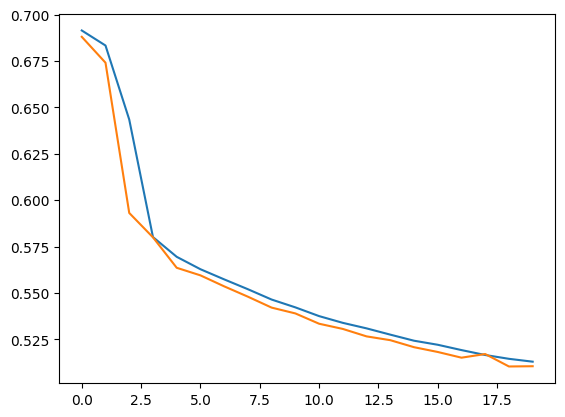

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

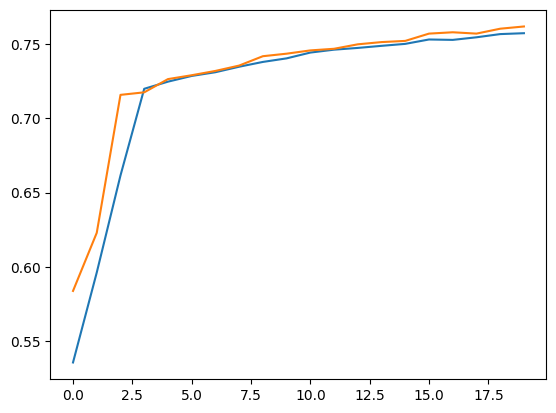

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

계속 발산할 것으로 보인다.

In [ ]:
# 긍정 여러개(positive)
sentences= [
"Absolutely brilliant movie! The storyline kept me hooked from start to finish.",
"A must-watch film! The performances were outstanding and the cinematography was breathtaking.",
"I was blown away by this movie! The direction was flawless and the soundtrack was mesmerizing.",
"Incredible film! I couldn't take my eyes off the screen the entire time.",
"A cinematic masterpiece! The acting was superb and the visual effects were stunning.",
"Such a heartwarming movie! The characters were well-developed and the message was powerful.",
"Thoroughly enjoyed every moment of this film! It's a true gem.",
"Fantastic movie! The plot twists kept me guessing until the very end.",
"An instant classic! The storytelling was captivating and the acting was phenomenal.",
"Bravo to the cast and crew! This movie exceeded all my expectations."
]

sequences = tokenizer.texts_to_sequences(sentences)
padded_seqeunces = pad_sequences(sequences, maxlen=100, padding=padding_type, truncating=trunc_type)

print(model.predict(padded_seqeunces))

1/1 [==============================] - 0s 23ms/step
[[0.5043701]
 [0.7697407]
 [0.7985296]
 [0.6056542]
 [0.7555123]
 [0.7167081]
 [0.7837463]
 [0.609416 ]
 [0.7325336]
 [0.636064 ]]


In [ ]:
# 부정 여러개(negative)

sentences = [
"Disappointing movie. The plot was confusing and the characters were underdeveloped.",
"I found this film to be quite dull. The story lacked depth and the pacing was slow.",
"Not worth the hype. The acting felt forced and the dialogue was cliché.",
"Mediocre at best. I expected more from such a highly anticipated movie.",
"I regret watching this movie. It was a complete waste of time.",
"Disjointed storytelling. The film failed to engage me on any level.",
"Uninspiring and forgettable. I wouldn't recommend this movie to anyone.",
"Poorly executed. The visuals were unimpressive and the plot was predictable.",
"A major letdown. I had high hopes for this movie but it fell short in every aspect.",
"I was bored throughout the entire film. There was nothing memorable about it."
]

sequences = tokenizer.texts_to_sequences(sentences)
padded_seqeunces = pad_sequences(sequences, maxlen=100, padding=padding_type, truncating=trunc_type)

print(model.predict(padded_seqeunces))

1/1 [==============================] - 0s 35ms/step
[[0.4509093 ]
 [0.5202284 ]
 [0.43529654]
 [0.6442021 ]
 [0.5170898 ]
 [0.5272853 ]
 [0.42410964]
 [0.4027628 ]
 [0.517841  ]
 [0.56229395]]


정확도가 75 정도이지만 예측이 꽤나 괜찮다.

에폭을 늘려서 훈련한다면 매우 좋은 결과를 얻을 것으로 예상된다.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              weights=[embedding_matrix], trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,
                                                       return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
adam = tf.keras.optimizers.Adam(learning_rate=1e-5,
                                beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy',optimizer=adam, metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3)

history = model.fit(train_padded, train_label, epochs=40,
                    validation_data=[test_padded, test_label],
                    callbacks=[early_stopping])

Epoch 1/40
1250/1250 [==============================] - 163s 124ms/step - loss: 0.6905 - accuracy: 0.5432 - val_loss: 0.6859 - val_accuracy: 0.5941
Epoch 2/40
1250/1250 [==============================] - 151s 121ms/step - loss: 0.6792 - accuracy: 0.6050 - val_loss: 0.6675 - val_accuracy: 0.6271
Epoch 3/40
1250/1250 [==============================] - 152s 121ms/step - loss: 0.6296 - accuracy: 0.6714 - val_loss: 0.5810 - val_accuracy: 0.7176
Epoch 4/40
1250/1250 [==============================] - 155s 124ms/step - loss: 0.5738 - accuracy: 0.7218 - val_loss: 0.5626 - val_accuracy: 0.7309
Epoch 5/40
1250/1250 [==============================] - 154s 123ms/step - loss: 0.5616 - accuracy: 0.7311 - val_loss: 0.5532 - val_accuracy: 0.7384
Epoch 6/40
1250/1250 [==============================] - 152s 122ms/step - loss: 0.5546 - accuracy: 0.7345 - val_loss: 0.5476 - val_accuracy: 0.7431
Epoch 7/40
1250/1250 [==============================] - 152s 121ms/step - loss: 0.5486 - accuracy: 0.7384 - val_

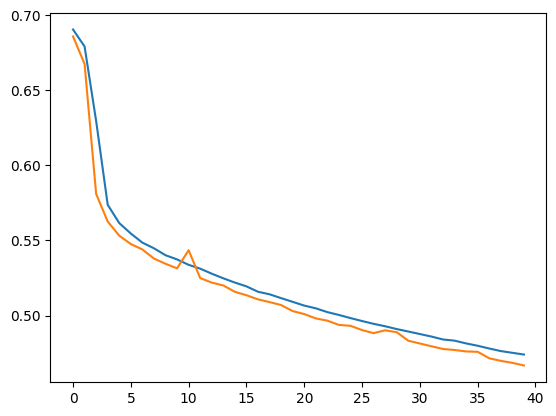

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

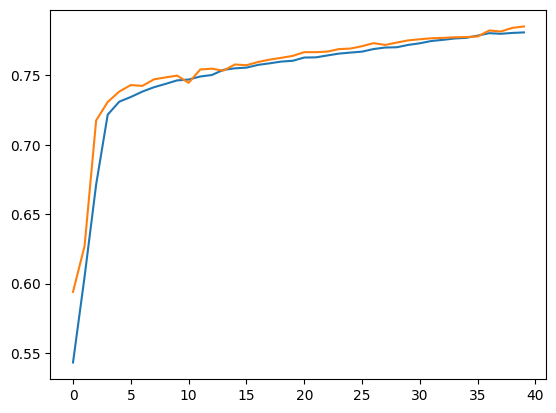

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
# 긍정 여러개(positive)
sentences= [
"Absolutely brilliant movie! The storyline kept me hooked from start to finish.",
"A must-watch film! The performances were outstanding and the cinematography was breathtaking.",
"I was blown away by this movie! The direction was flawless and the soundtrack was mesmerizing.",
"Incredible film! I couldn't take my eyes off the screen the entire time.",
"A cinematic masterpiece! The acting was superb and the visual effects were stunning.",
"Such a heartwarming movie! The characters were well-developed and the message was powerful.",
"Thoroughly enjoyed every moment of this film! It's a true gem.",
"Fantastic movie! The plot twists kept me guessing until the very end.",
"An instant classic! The storytelling was captivating and the acting was phenomenal.",
"Bravo to the cast and crew! This movie exceeded all my expectations."
]

sequences = tokenizer.texts_to_sequences(sentences)
padded_seqeunces = pad_sequences(sequences, maxlen=100, padding=padding_type, truncating=trunc_type)

print(model.predict(padded_seqeunces))

1/1 [==============================] - 1s 1s/step
[[0.35300142]
 [0.88615584]
 [0.8493675 ]
 [0.531355  ]
 [0.8307194 ]
 [0.8044649 ]
 [0.76924056]
 [0.5093253 ]
 [0.86176604]
 [0.65114796]]


In [ ]:
# 부정 여러개(negative)

sentences = [
"Disappointing movie. The plot was confusing and the characters were underdeveloped.",
"I found this film to be quite dull. The story lacked depth and the pacing was slow.",
"Not worth the hype. The acting felt forced and the dialogue was cliché.",
"Mediocre at best. I expected more from such a highly anticipated movie.",
"I regret watching this movie. It was a complete waste of time.",
"Disjointed storytelling. The film failed to engage me on any level.",
"Uninspiring and forgettable. I wouldn't recommend this movie to anyone.",
"Poorly executed. The visuals were unimpressive and the plot was predictable.",
"A major letdown. I had high hopes for this movie but it fell short in every aspect.",
"I was bored throughout the entire film. There was nothing memorable about it."
]

sequences = tokenizer.texts_to_sequences(sentences)
padded_seqeunces = pad_sequences(sequences, maxlen=100, padding=padding_type, truncating=trunc_type)

print(model.predict(padded_seqeunces))

1/1 [==============================] - 0s 23ms/step
[[0.3351937 ]
 [0.53252673]
 [0.465757  ]
 [0.84256786]
 [0.44284335]
 [0.31210715]
 [0.40195078]
 [0.3580664 ]
 [0.49713156]
 [0.5565717 ]]


예측이 나쁘지는 않다. 앞의 단어도 고려하다 보니 혼동이 오는 문장이 몇 개 있는 것 같다.

각 단어로만 평가할 때가 더욱 예측을 잘한다는 것을 볼 수 있다.

이는 리뷰를 평가할 때는 RNN을 사용하여 문맥을 파악하면 더욱 혼란을 줄 수 있는 것 같다.